In [1]:
pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install tensorflow

In [3]:
import tensorflow as tf
print(tf.__version__)

2024-02-15 13:38:36.899740: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.15.0


In [4]:
## import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
df = pd.read_csv('~/Documents/Youtube_ML/DL/Churn_Modelling.csv', sep=',')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
## divide the datasets into dependemnt and independant features

X = df.iloc[:,3:13]
y = df.iloc[:,13]

In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [9]:
## dataset is not that clean
# Categorical features - Gender, Geographical, age
# we need to fix, we can do one hot encoding or other

In [10]:
## Feature Engineering
pd.get_dummies(X['Geography'])
# we can see below encoding is done , we can see francxe is 1

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [11]:
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender  = pd.get_dummies(X['Gender'],drop_first=True)

In [12]:
## concatenate the variables with dataframe , axis =1 is for coloumn
X=X.drop(['Geography','Gender'],axis=1)

In [13]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [14]:
X = pd.concat([X,geography,gender],axis=1)

In [15]:
## splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [17]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [19]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [20]:
X_train.shape

(8000, 11)

In [21]:
from tensorflow.keras.models import Sequential # 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [22]:
## lets initialize the ANN
classifier = Sequential()

In [23]:
## adding the input layer - in X layer we have 11 node
classifier.add(Dense(units=11,activation='relu')) # relu will get applied to next layer

In [24]:
## adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
# we can add drop layer
#classifier.add(Dropout(0.2))

In [25]:
## adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [26]:
## adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [27]:
## train all neuron network
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
## adam uses learning rate of 0.1
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [29]:
## train neural network -  we have given 1000 epoch
## validation split is 0.33
##model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000)

In [30]:
##early stopping - when accuracy is not increasing then it will automatically stop
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [31]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 4ms/step - loss: 0.5777 - accuracy: 0.7457 - val_loss: 0.4625 - val_accuracy: 0.7959
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4380 - accuracy: 0.8056 - val_loss: 0.4392 - val_accuracy: 0.8039
Epoch 3/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4194 - accuracy: 0.8201 - val_loss: 0.4319 - val_accuracy: 0.8095
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4104 - accuracy: 0.8289 - val_loss: 0.4266 - val_accuracy: 0.8145
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4044 - accuracy: 0.8339 - val_loss: 0.4231 - val_accuracy: 0.8164
Epoch 6/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4009 - accuracy: 0.8364 - val_loss: 0.4197 - val_accuracy: 0.8198
Epoch 7/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3972 - accuracy: 0.8380 - val_loss: 0.4155 - val_accuracy:

536/536 [==============================] - 1s 2ms/step - loss: 0.3157 - accuracy: 0.8673 - val_loss: 0.3597 - val_accuracy: 0.8508
Epoch 58/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3152 - accuracy: 0.8690 - val_loss: 0.3597 - val_accuracy: 0.8478
Epoch 59/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3150 - accuracy: 0.8668 - val_loss: 0.3583 - val_accuracy: 0.8546
Epoch 60/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3151 - accuracy: 0.8679 - val_loss: 0.3616 - val_accuracy: 0.8501
Epoch 61/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3146 - accuracy: 0.8681 - val_loss: 0.3594 - val_accuracy: 0.8535
Epoch 61: early stopping


In [32]:
## 
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

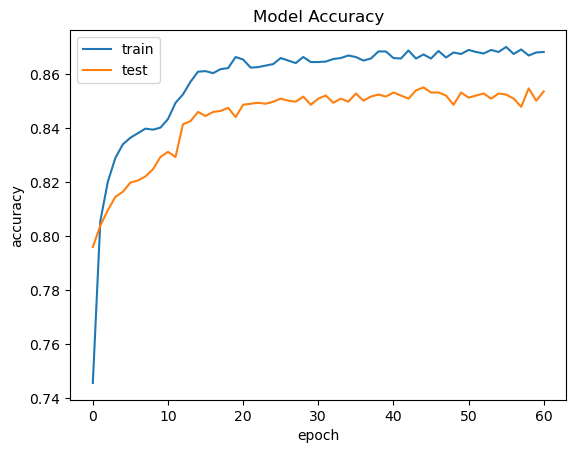

In [33]:
# summarise history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

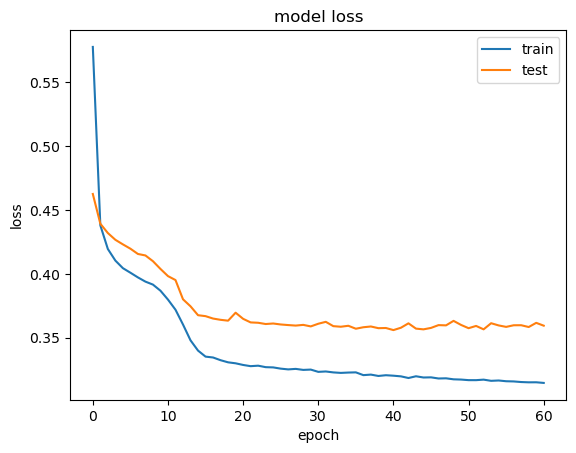

In [38]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc= 'upper right')
plt.show()

In [39]:
# Part 3 - Making the prediction and evaluting the model

# Predicting the test set result
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5) # whenever value is greter than 0.5 value is 1 otherwise 0

63/63 [==============================] - 0s 1ms/step


In [41]:
## make the confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1507,   88],
       [ 207,  198]])

In [43]:
## calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.8525

In [44]:
## get the weights, we can store the weight as pickle file and use it whenver we want

classifier.get_weights()

[array([[-1.87742859e-01, -5.82778603e-02, -1.79956928e-01,
         -2.70336568e-01, -2.50236779e-01,  1.44911587e-01,
          3.99973422e-01,  1.85812652e-01,  1.55411474e-03,
          5.13718463e-02, -2.91887298e-02],
        [-3.56585473e-01, -3.53218853e-01, -5.10071576e-01,
          1.63136911e+00, -7.42586039e-04,  1.45402998e-01,
         -7.28107870e-01, -5.13907015e-01,  5.95765650e-01,
         -3.37484479e-01,  7.26065099e-01],
        [-6.07365631e-02,  3.76542985e-01,  9.88367945e-02,
         -1.68241456e-01, -3.80618870e-01,  1.30699396e-01,
         -3.65038328e-02, -1.79425776e-01, -8.09896290e-02,
          1.41290426e-01,  1.98817343e-01],
        [ 6.27162814e-01, -4.87776995e-01, -1.43658444e-01,
          1.61437422e-01,  2.36294612e-01, -1.25956202e+00,
         -4.49429035e-01, -4.44198400e-01,  6.56431973e-01,
         -5.98786771e-01, -4.13451605e-02],
        [-4.63322490e-01, -4.26907927e-01,  1.16415930e+00,
         -6.15145385e-01, -5.26573539e-01, -